## Investigating global & Rabat (MO) average temperature

This jupyter notebook analyses global average temperature and average temperature in Rabat (Morocco) to find trends, patterns or differences.The analysis uses the simple moving average technique to smooth out the unwanted changes in average temperature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Import city temperature data, global temperature data, and extract the temperature related to Rabat city.

In [2]:
city_data = pd.read_csv('city_data.csv', index_col=0)
global_data = pd.read_csv('global_data.csv', index_col=0)
rabat_data = city_data[city_data['city'] == 'Rabat'].copy()

In [3]:
city_data.head()

,city,country,avg_temp
year,,,
1849,Abidjan,Côte D'Ivoire,25.58
1850,Abidjan,Côte D'Ivoire,25.52
1851,Abidjan,Côte D'Ivoire,25.67
1852,Abidjan,Côte D'Ivoire,NaN
1853,Abidjan,Côte D'Ivoire,NaN


In [4]:
global_data.head()

,avg_temp
year,
1750,8.72
1751,7.98
1752,5.78
1753,8.39
1754,8.47


In [5]:
rabat_data.head()

,city,country,avg_temp
year,,,
1753,Rabat,Morocco,17.31
1754,Rabat,Morocco,17.47
1755,Rabat,Morocco,17.16
1756,Rabat,Morocco,17.53
1757,Rabat,Morocco,17.42


##### Display line graphs to see plot the global and local(Rabat) average temperature

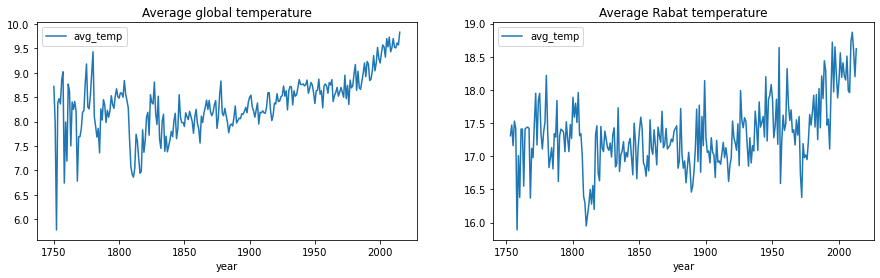

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
global_data.plot.line(y='avg_temp', ax=axes[0], title='Average global temperature')
rabat_data.plot.line(y='avg_temp', ax=axes[1], title='Average Rabat temperature')

##### Find out the range of years in global and local data

In [7]:
global_data.reset_index().year.agg(['min', 'max', 'count'])

min      1750
max      2015
count     266
Name: year, dtype: int64

In [8]:
rabat_data.reset_index().year.agg(['min', 'max', 'count'])

min      1753
max      2013
count     261
Name: year, dtype: int64

##### Drop the years in global data not available in local data

In [9]:
global_data.drop(index=[1750, 1751, 1752, 2014, 2015], inplace=True)

##### Calculate the simple moving average with different windows (5 years, 10 years, and 20 years) in global & local data

In [10]:
rabat_data['mva_temp_5'] = rabat_data.iloc[:,2].rolling(window=5).mean()
rabat_data['mva_temp_10'] = rabat_data.iloc[:,2].rolling(window=10).mean()
rabat_data['mva_temp_20'] = rabat_data.iloc[:,2].rolling(window=20).mean()

In [11]:
global_data['mva_temp_5'] = global_data.iloc[:,0].rolling(window=5).mean()
global_data['mva_temp_10'] = global_data.iloc[:,0].rolling(window=10).mean()
global_data['mva_temp_20'] = global_data.iloc[:,0].rolling(window=20).mean()

##### Plot the moving average calculated above

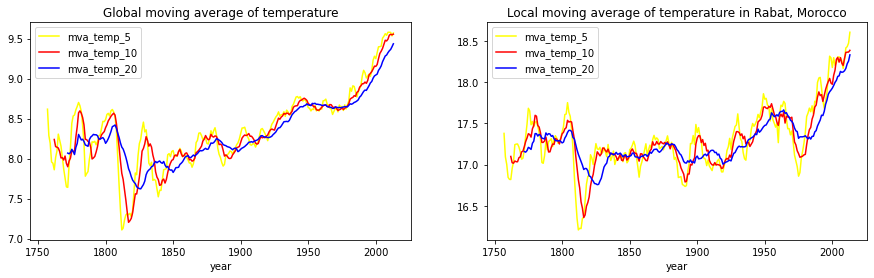

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
global_data.plot.line(y=['mva_temp_5', 'mva_temp_10', 'mva_temp_20'], color=['yellow', 'red', 'blue'], title='Global moving average of temperature', ax=axes[0])
rabat_data.plot.line(y=['mva_temp_5', 'mva_temp_10', 'mva_temp_20'], color=['yellow', 'red', 'blue'], title='Local moving average of temperature in Rabat, Morocco', ax=axes[1])

##### Select the moving average window best suited for this analysis. Next create a joined DataFrame with only the needed columns

In [13]:
mva_rabat_data = rabat_data.loc[:,['mva_temp_10']]
mva_global_data = global_data.loc[:,['mva_temp_10']]
joined_data = mva_rabat_data.join(mva_global_data, how='inner', lsuffix='_rabat', rsuffix='_global')

In [14]:
joined_data.head(10)

,mva_temp_10_rabat,mva_temp_10_global
year,,
1753,NaN,NaN
1754,NaN,NaN
1755,NaN,NaN
1756,NaN,NaN
1757,NaN,NaN
1758,NaN,NaN
1759,NaN,NaN
1760,NaN,NaN
1761,NaN,NaN


##### Drop the null rows in joined data

In [15]:
joined_data.dropna(inplace=True)

In [16]:
joined_data.head()

,mva_temp_10_rabat,mva_temp_10_global
year,,
1762,17.099,8.239
1763,17.023,8.150
1764,17.017,8.143
1765,17.044,8.132
1766,17.035,8.088


##### Plot the joined data to compare moving average (over 10 years) corresponding to global & local data simultaneously

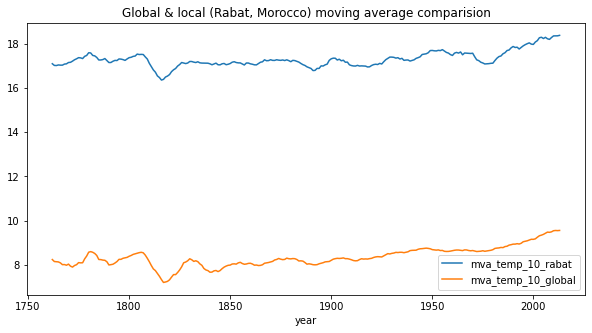

In [17]:
fig = joined_data.plot.line(y=['mva_temp_10_rabat', 'mva_temp_10_global'], figsize=(10,5), title='Global & local (Rabat, Morocco) moving average comparision').get_figure()

##### Plot a scatter plot with regression line to investigate correlation

Text(0.5, 1.0, 'Correlation between global & local (Rabat, Morocco) moving average')

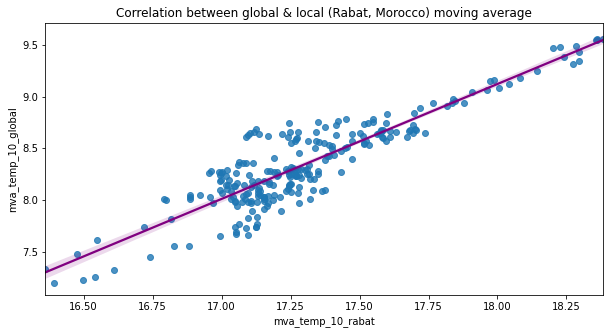

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(ax=ax, x='mva_temp_10_rabat', y='mva_temp_10_global', data=joined_data, line_kws={"color": "purple"}).set_title('Correlation between global & local (Rabat, Morocco) moving average')

##### Calculate the difference between the local & gobal moving average. Aggregate the min, max, mean, standard deviation for further analysis

In [20]:
mva_diff = (joined_data['mva_temp_10_rabat'] - joined_data['mva_temp_10_global'])
mva_diff.agg(['min', 'mean', 'std', 'max']).to_frame().rename(columns={0: 'value'})

,value
min,8.43800
mean,8.95529
std,0.19524
max,9.43000


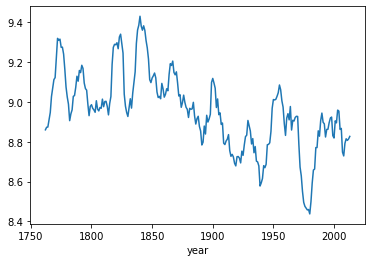

In [21]:
mva_diff.plot.line()

It can be seen from the plot above that the difference between local & global average temperature is oscillating between 8.438°C and 9.43°C with a mean of 8.956°C and a low standard deviation indicating that the difference is not changing with a huge rate overtime, in fact, one can say that local average temperature in Rabat being 8.955°C above the gobal average temperature is a good approximation.